In [1]:
import pandas as pd
def get_csv_data(video_folder_name, fileName):    
    data = pd.read_csv(fileName, sep=';')
    data.columns = ['ID', 'file_name', 'label']
    file_paths = []
    for entry in data.iloc():
        file_paths.append(video_folder_name + entry['file_name'])
    data['file_path'] = file_paths
    data.set_index('ID', inplace=True, drop=False)
    return data

training = get_csv_data('../WS2020_DeepLearning_Videos/Task1_Training_Validation/', '../Task1_Training_Labels_Videos.csv')
test = get_csv_data('../WS2020_DeepLearning_Videos/Task1_Test/', '../Task1_Test_Labels_Videos.csv')

display(training)
display(test)

,ID,file_name,label,file_path
ID,,,,
1,1,_8Vy3dlHg2w_00000.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Training_V...
2,2,_8Vy3dlHg2w_00001.mp4,Upwards,../WS2020_DeepLearning_Videos/Task1_Training_V...
3,3,_8Vy3dlHg2w_00002.mp4,Front,../WS2020_DeepLearning_Videos/Task1_Training_V...
4,4,_8Vy3dlHg2w_00003.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Training_V...
5,5,_8Vy3dlHg2w_00004.mp4,Downwards,../WS2020_DeepLearning_Videos/Task1_Training_V...
...,...,...,...,...
96,96,_8Vy3dlHg2w_00100.mp4,Front,../WS2020_DeepLearning_Videos/Task1_Training_V...
97,97,_8Vy3dlHg2w_00101.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Training_V...
98,98,_8Vy3dlHg2w_00102.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Training_V...


,ID,file_name,label,file_path
ID,,,,
1,1,_8Vy3dlHg2w_00105.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
2,2,_8Vy3dlHg2w_00106.mp4,Front,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
3,3,_8Vy3dlHg2w_00108.mp4,Downwards,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
4,4,_8Vy3dlHg2w_00109.mp4,Front,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
5,5,_8Vy3dlHg2w_00110.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
6,6,_8Vy3dlHg2w_00111.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
7,7,_8Vy3dlHg2w_00112.mp4,Front,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
8,8,_8Vy3dlHg2w_00113.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
9,9,_8Vy3dlHg2w_00114.mp4,Downwards,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...


In [2]:
def encode_position(label):
    if label == 'Side':
        return 0
    if label == 'Front':
        return 1
    if label == 'Upwards':
        return 2
    if label == 'Downwards':
        return 3
        

In [3]:
import cv2
import numpy as np
class_names = ['Side', 'Front', 'Upwards', 'Downwards']
def get_frames_labels(data, frames, labels):
    for file in data.iloc():
        file_path = file['file_path']
        video_id = file['ID']
        label = encode_position(data.loc[video_id].label)
        
        # Playing video from file:
        cap = cv2.VideoCapture(file['file_path'])
        success, frame = cap.read()

        while(success):
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, (256,256))
            frames.append(frame)
            labels.append(label)
            # Capture frame by frame
            success, frame = cap.read()

        cap.release()
        cv2.destroyAllWindows()
        # Remove this break when accessing all video files
        
training_frames = []
training_labels = []
test_frames = []
test_labels = []
get_frames_labels(training, training_frames, training_labels)
get_frames_labels(test, test_frames, test_labels)

(7008, 256, 256, 3)
(2238, 256, 256, 3)


array([0, 0, 0, ..., 0, 0, 0])

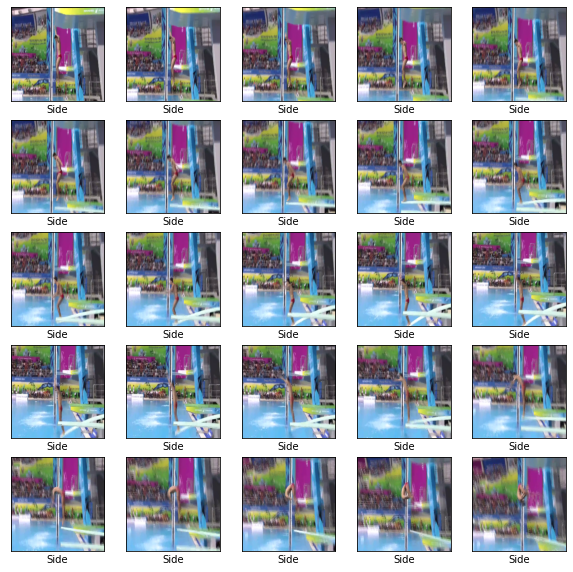

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_images = np.array(training_frames)
train_labels = np.array(training_labels)
test_images = np.array(test_frames)
test_labels = np.array(test_labels)

print(train_images.shape)
print(test_images.shape)
display(train_labels)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [52]:
from tensorflow.keras import layers, models, regularizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
flatten_3 (Flatten)          (None, 2064512)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                132128832 
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 260       
Total params: 132,129,988
Trainable params: 132,129,988
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
219/219 [==============================] - 7s 31ms/step - loss: 929.9362 - accuracy: 0.9483 - val_loss: 0.4421 - val_accuracy: 0.9964
Epoch 2/10
219/219 [==============================] - 7s 31ms/step - loss: 21.4468 - accuracy: 0.9765 - val_loss: 1.1230 - val_accuracy: 0.9964
Epoch 3/10
219/219 [==============================] - 7s 31ms/step - loss: 0.5329 - accuracy: 0.9984 - val_loss: 0.4626 - val_accuracy: 0.9969
Epoch 4/10
219/219 [==============================] - 7s 31ms/step - loss: 0.8373 - accuracy: 0.9961 - val_loss: 0.6688 - val_accuracy: 0.9969
Epoch 5/10
219/219 [==============================] - 7s 31ms/step - loss: 7.4582 - accuracy: 0.9832 - val_loss: 2.6694 - val_accuracy: 0.9942
Epoch 6/10
219/219 [==============================] - 7s 31ms/step - loss: 1.2809 - accuracy: 0.9970 - val_loss: 1.1282 - val_accuracy: 0.9969
Epoch 7/10
219/219 [==============================] - 7s 31ms/step - loss: 0.3329 - accuracy: 0.9979 - val_loss: 1.0324 - val_accuracy: 0.9

70/70 - 1s - loss: 0.5773 - accuracy: 0.9960


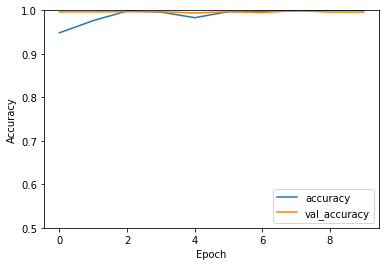

In [54]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

1. Input Video handling
2. Layer anpassen

In [50]:
from functools import reduce
def predict_video(path):
    # Playing video from file:
    images_of_video = []
    cap = cv2.VideoCapture(path)
    success, frame = cap.read()

    while(success):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, (256,256))
        images_of_video.append(frame)
        # Capture frame by frame
        success, frame = cap.read()
    cap.release()
    cv2.destroyAllWindows()
    
    images_of_video = np.array(images_of_video)
    
    predictions = model.predict(images_of_video)
    
    predicted_labels = [class_names[np.argmax(prediction)] for prediction in predictions]
    
    most_frequent_label = max(set(predicted_labels), key = predicted_labels.count)
    
    mean_score = reduce(
        lambda score_total,prediction:
            score_total+np.max(prediction)
        , predictions)/len(predictions)
    
    frequent_label_index = class_names.index(most_frequent_label)
    
    mean_score = 0
    for prediction in predictions:
        score = tf.nn.softmax(prediction)
        mean_score += score[frequent_label_index]
    mean_score = mean_score / len(predictions)
    
    print(
        """
         File: {} 
         predicted perspective: {} 
         confidence: {:.2f}%
         """
        .format(path, most_frequent_label, 100 * mean_score)
    )
    


predict_video('../WS2020_DeepLearning_Videos/Task2_Test/_tigfCJFLZg_00314.mp4')


         File: ../WS2020_DeepLearning_Videos/Task2_Test/_tigfCJFLZg_00314.mp4 
         predicted perspective: Side 
         confidence: 96.55%
         


In [56]:
import os

video_folder = "../WS2020_DeepLearning_Videos/Task2_Test/"
for root, dirs, files in os.walk(video_folder):
    for filename in files:
        if '.mp4' in filename:
            predict_video(f"{video_folder}/{filename}")


         File: ../WS2020_DeepLearning_Videos/Task2_Test//_tigfCJFLZg_00351.mp4 
         predicted perspective: Side 
         confidence: 74.71%
         

         File: ../WS2020_DeepLearning_Videos/Task2_Test//_tigfCJFLZg_00317.mp4 
         predicted perspective: Side 
         confidence: 87.95%
         

         File: ../WS2020_DeepLearning_Videos/Task2_Test//_tigfCJFLZg_00374.mp4 
         predicted perspective: Side 
         confidence: 78.26%
         

         File: ../WS2020_DeepLearning_Videos/Task2_Test//_tigfCJFLZg_00377.mp4 
         predicted perspective: Side 
         confidence: 82.37%
         

         File: ../WS2020_DeepLearning_Videos/Task2_Test//_tigfCJFLZg_00354.mp4 
         predicted perspective: Side 
         confidence: 74.70%
         

         File: ../WS2020_DeepLearning_Videos/Task2_Test//_tigfCJFLZg_00328.mp4 
         predicted perspective: Side 
         confidence: 60.78%
         

         File: ../WS2020_DeepLearning_Videos/Task2_Test//


         File: ../WS2020_DeepLearning_Videos/Task2_Test//_tigfCJFLZg_00330.mp4 
         predicted perspective: Side 
         confidence: 79.22%
         

         File: ../WS2020_DeepLearning_Videos/Task2_Test//_tigfCJFLZg_00327.mp4 
         predicted perspective: Side 
         confidence: 87.57%
         

         File: ../WS2020_DeepLearning_Videos/Task2_Test//_tigfCJFLZg_00337.mp4 
         predicted perspective: Side 
         confidence: 94.50%
         

         File: ../WS2020_DeepLearning_Videos/Task2_Test//_tigfCJFLZg_00320.mp4 
         predicted perspective: Side 
         confidence: 78.90%
         

         File: ../WS2020_DeepLearning_Videos/Task2_Test//_tigfCJFLZg_00384.mp4 
         predicted perspective: Side 
         confidence: 61.62%
         

         File: ../WS2020_DeepLearning_Videos/Task2_Test//_tigfCJFLZg_00345.mp4 
         predicted perspective: Side 
         confidence: 76.12%
         

         File: ../WS2020_DeepLearning_Videos/Task2_Test//

Conv2D


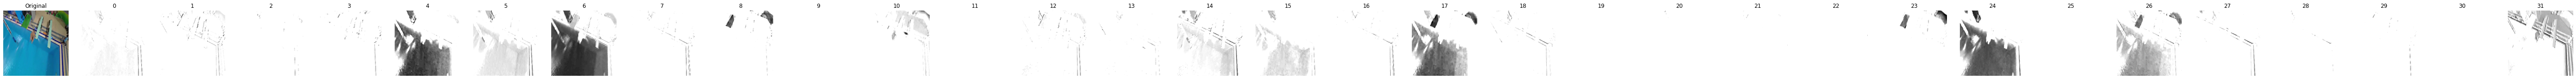

In [100]:
from tensorflow.keras import backend as K
my_image = test_images[180]
my_image_raw = np.squeeze(my_image)

image = np.expand_dims(my_image, axis=0)
layer = model.get_layer(index = 0)
print(type(layer).__name__)
convolutions = K.function(model.inputs, [layer.output])([image])
#kick out empty axes
convolutions = np.squeeze(convolutions)
#rearange the order so that we can iterate over the images
convolutions = np.transpose(convolutions)
width = 33
fig = plt.figure(figsize=(100, 100))
# draw the original pic first
ax = fig.add_subplot(1, width, 1)
ax.axis('off')
ax.title.set_text("Original")
ax.imshow(my_image_raw, interpolation='sinc' , cmap='binary')
# draw some examples for filter results
for index, filter in enumerate(convolutions):
    if index == width - 1:
        break
    ax = fig.add_subplot(1, width, index + 2)
    ax.axis('off')
    ax.title.set_text(index)
    ax.imshow(filter.transpose(), interpolation = 'sinc', cmap='binary')
plt.show()
plt.close()